In [61]:
# imports and utility functions
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import datasets
from datetime import datetime
from matplotlib import ticker
from collections import Counter
import matplotlib.pyplot as plt
from MDLP import MDLP_Discretizer
from IPython.display import display_html
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# displays pandas dataframes side by side
def tables_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table', 'table style="display:inline;"'), raw=True)

# parses dates with different formats
def multiformat_date_parse(text):
    for fmt in ('%Y-%m-%d', '9999-99-99'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('No valid date format found.')

# utility function for plotting
def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),
                    textcoords="offset points",
                    ha=ha[xpos], va='bottom', rotation='vertical')

# load the preprocessed dataset
data = pd.read_csv("./datasets/preprocessed.csv", dtype={'gender': 'category', 'patient_type': 'category', 'pneumonia': 'category', 'age': 'int64', 'pregnancy': 'category', 'diabetes': 'category', 'copd': 'category',
             'asthma': 'category', 'immunosuppression': 'category', 'hypertension': 'category', 'other_diseases': 'category', 'cardiovascular_disease': 'category',
             'obesity': 'category', 'chronic_kidney_disease': 'category', 'smoking': 'category'})

# use numerical encoding for categorical attributes
data['gender'] = data['gender'].cat.codes
data['pneumonia'] = data['pneumonia'].cat.codes
data['pregnancy'] = data['pregnancy'].cat.codes
data['diabetes'] = data['diabetes'].cat.codes
data['copd'] = data['copd'].cat.codes
data['asthma'] = data['asthma'].cat.codes
data['immunosuppression'] = data['immunosuppression'].cat.codes
data['hypertension'] = data['hypertension'].cat.codes
data['other_diseases'] = data['other_diseases'].cat.codes
data['cardiovascular_disease'] = data['cardiovascular_disease'].cat.codes
data['obesity'] = data['obesity'].cat.codes
data['chronic_kidney_disease'] = data['chronic_kidney_disease'].cat.codes
data['smoking'] = data['smoking'].cat.codes

data

,gender,patient_type,pneumonia,age,pregnancy,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular_disease,obesity,chronic_kidney_disease,smoking
0,1,NOT-HOSPITALIZED,0,41,1,0,0,0,0,0,0,0,0,0,0
1,0,HOSPITALIZED,1,66,0,1,0,0,0,1,0,0,1,0,0
2,1,NOT-HOSPITALIZED,0,47,1,1,0,0,0,0,0,0,0,0,0
3,1,NOT-HOSPITALIZED,0,54,1,0,0,0,0,0,0,0,0,0,0
4,0,NOT-HOSPITALIZED,0,26,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166623,0,NOT-HOSPITALIZED,0,23,0,0,0,0,0,0,0,0,0,0,0
3166624,1,HOSPITALIZED,0,76,1,0,0,0,0,1,0,0,0,0,0
3166625,1,NOT-HOSPITALIZED,0,25,1,0,0,0,0,0,0,0,0,0,0
3166626,0,NOT-HOSPITALIZED,0,44,0,0,0,0,0,0,0,0,0,0,0


## **$\chi^2$ Correlation**

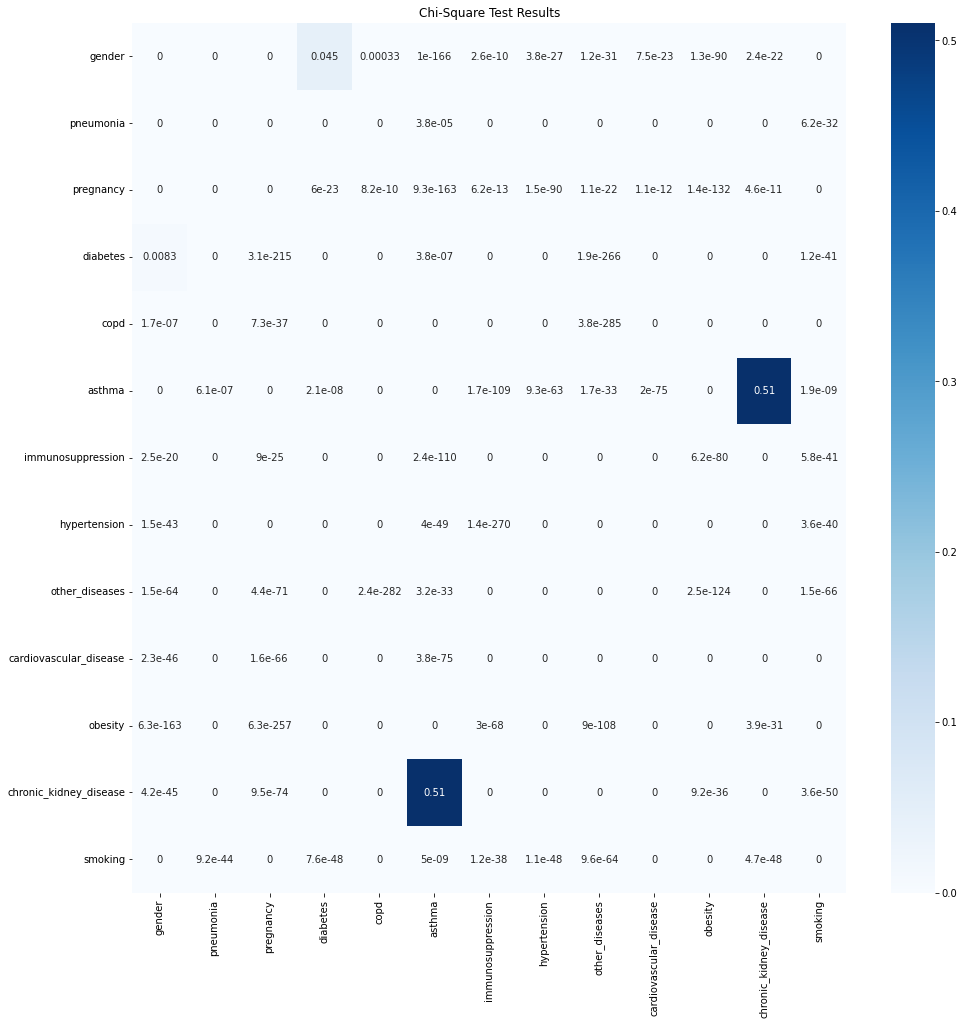

In [322]:
# Extracting column names
temp_X = X.drop('age', axis = 1).copy()

resultant = pd.DataFrame(data=[(0 for i in range(len(temp_X.columns))) for i in range(len(temp_X.columns))], columns=list(temp_X.columns))
resultant.set_index(pd.Index(list(temp_X.columns)), inplace = True)
for i in list(temp_X.columns):
    for j in list(temp_X.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(temp_X[i]).reshape(-1, 1), np.array(temp_X[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val

fig = plt.figure(figsize=(16,16))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

## **Mutual Information**

In [323]:
feature_scores = mutual_info_classif(X, y, random_state=0)
feature_scores

/home/rrahmani/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

# **One-Hot Encoding**

In [ ]:
age = X['age']
age

In [ ]:
X = X.drop('age', axis = 1)
X

In [ ]:
X = pd.get_dummies(X)
X

In [ ]:
X['age'] = age
X

In [ ]:
# plot one-hot encoded dataset

## **Split Dataset in Training and Test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3)

NameError: name 'X_under' is not defined

## **Feature Selection**

## **Finding Important Features in Scikit-learn**

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
%matplotlib inline
sns.barplot(x=forest_importances, y=forest_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## **Training**

In [ ]:
X_train = X_train[['pneumonia', 'age', 'diabetes', 'hypertension', 'chronic_kidney_disease']]
X_test = X_test[['pneumonia', 'age', 'diabetes', 'hypertension', 'chronic_kidney_disease']]
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
rf_pred = forest.predict(X_test)
rf_probs = forest.predict_proba(X_test)[:, 1]

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, rf_pred))

## **Testing**

In [ ]:
roc_value = roc_auc_score(y_test, rf_probs)
roc_value

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
metrics.plot_roc_curve(forest, X_test, y_test, pos_label='HOSPITALIZED', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
plot_confusion_matrix(forest, X_test, y_test, ax=ax)
plt.show()

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, rf_pred)}\n")